In [103]:
import math 
import numpy as np
from sklearn import linear_model 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from os import mkdir 
import string
import random
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
sns.set(style="ticks")

### Question 1: Chargement des données 

In [104]:
url = "https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv"
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [3]:
data.shape

(442, 211)

On a :

-  **211** variables explicatives 

- **442** observations

### Question 2 

In [4]:
mean_X = data.iloc[:,0:209].mean()
std_X = data.iloc[:,0:209].std()

#### Somme des mean_X

In [86]:
sum_mean_X = sum(mean_X)/len(mean_X)
print('La moyenne des variables explicatives vaut: ' + str(round(sum_mean_X,2)))

La moyenne des variables explicatives vaut: -0.0


In [87]:
sum_std_X = sum(std_X)/len(mean_X)
print('L écart type des variables explicatives vaut ' + str(round(sum_std_X, 2)))

L écart type des variables explicatives vaut 1.0


les Variables explicatives sont bien centrées et normalisées

#### Moyenne de la variable à expliquer

In [7]:
mean_y = data.iloc[:,210].mean()
std_y = data.iloc[:,210].std()

In [89]:
print('La moyenne de la variable à expliquer vaut: ' + str(round(mean_y,2)))

La moyenne de la variable à expliquer vaut: 152.13


In [90]:
print('L écart type de la variable à expliquer vaut: ' + str(round(std_y,2)))

L écart type de la variable à expliquer vaut: 77.09


la Variable à expliquer n'est ni centrée, ni normalisée

#### Plot Scatter 

In [10]:
indexes = np.hstack(([210], np.random.randint(0, 210, 4)))

Text(0.5, 0.98, 'Base de données diabètes avec 4 covariables prises au hasard et la variable à expliquer ')

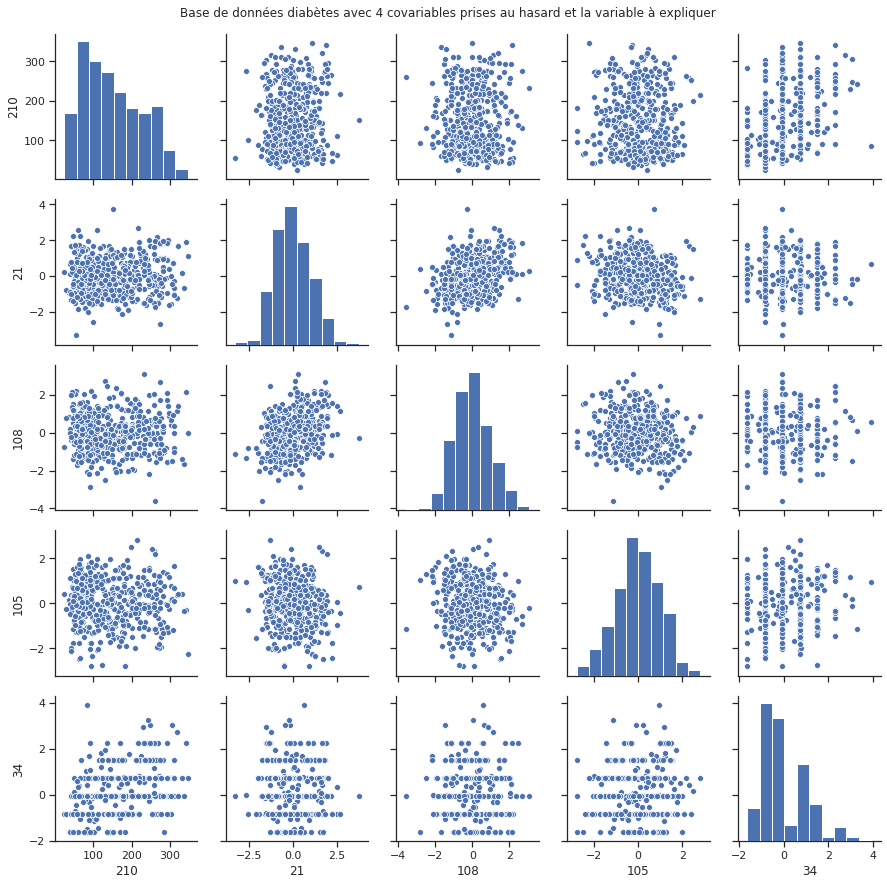

In [11]:
g = sns.pairplot(data.iloc[:,indexes])
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Base de données diabètes avec 4 covariables prises au hasard et la variable à expliquer ')

Cette représentation permet de visualiser les relations entre variables. En observant les histogrammes de distribution, on constate que les variables explicatives semblent suivre une loi gaussienne, contrairement à la variable à expliquer dont on a du mal à deviner la loi.

### Question 3 : Echantillon d’apprentissage et de test

In [105]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.iloc[:, 0:210], data.iloc[:,-1], test_size=0.2, random_state=50)

In [92]:
print('La taille de l echantillon de données de training est: ' + str(X_train.shape))

La taille de l echantillon de données de training est: (353, 210)


In [93]:
print('La taille de l echantillon de données de test est: ' + str(X_test.shape))

La taille de l echantillon de données de test est: (89, 210)


### Question 4 : Donner la matrice de covariance calculée sur X train

#### Matrice de covariance calculée sur X train

In [94]:
Cov_X_train = X_train.cov()

In [95]:
Cov_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.020552,-0.116973,0.013046,-0.337603,0.115215,0.175941,-0.049797,-0.191413,-0.006027,-0.087154,...,-0.175718,-0.038165,0.028573,0.004684,-0.050144,-0.008605,-0.118343,-0.030325,0.149419,-0.075428
1,-0.116973,0.943405,0.042236,-0.210460,-0.090581,-0.087115,0.150359,-0.087839,0.039478,-0.097722,...,-0.110745,-0.069057,-0.053672,-0.211006,-0.017390,0.006054,0.045269,-0.097056,-0.075318,0.056174
2,0.013046,0.042236,0.920366,-0.118177,0.141853,-0.038057,-0.034624,0.007079,-0.043149,-0.139800,...,0.145685,0.009166,0.155187,0.097713,-0.032561,0.091630,-0.009099,-0.331835,0.011635,-0.159793
3,-0.337603,-0.210460,-0.118177,0.973730,0.012408,-0.099780,0.123167,-0.079789,0.046215,-0.006365,...,0.091672,0.068380,-0.148141,0.122174,-0.035334,-0.188276,0.049744,-0.024871,-0.190936,-0.355853
4,0.115215,-0.090581,0.141853,0.012408,0.993892,-0.050281,0.003896,0.226013,0.021580,0.098564,...,0.161066,-0.009418,0.094295,-0.082632,-0.151307,-0.101112,0.014530,-0.076666,0.014278,-0.122837


In [97]:
eigval = np.linalg.eigvals(Cov_X_train)

Text(0.5, 0, 'Features')

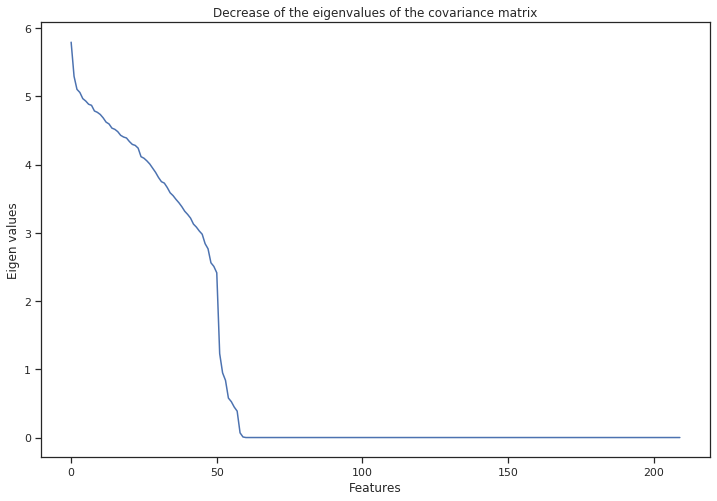

In [330]:
plt.figure(figsize=(12, 8))
plt.plot(np.sort(eigval)[::-1])
plt.title("Decrease of the eigenvalues of the covariance matrix")
plt.ylabel("Eigen values")
plt.xlabel("Features")

Il est préférable de ne garder que les 60 premières variables car les valeurs propres au-delà de 60 sont toutes nulles.
Garder ces valeurs nulles rendra impossible l'inversion de notre matrice de features.

### Question 5

In [19]:
v, d, vt = np.linalg.svd(Cov_X_train)
d.shape

(210,)

In [20]:
X_train_pca = np.dot(X_train, v[:,:60])

In [21]:
modele_pca = linear_model.LinearRegression(fit_intercept=True)
modele_pca.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
X_test_pca = np.dot(X_test, v[:,:60])

In [332]:
print('La valeur de l"intercept avec PCA est: ' + str(modele_pca.intercept_))

La valeur de l"intercept avec PCA est: 151.4582639330459


In [333]:
print('La valeur du coefficient de régression avec PCA est: ' + str(modele_pca.coef_))

La valeur du coefficient de régression avec PCA est: [ 1.23263107e+01  2.30824994e+00  2.46446523e+00 -1.78828721e+00
 -1.05948935e+00 -1.09329078e+00 -1.72063221e+00  5.62617726e-01
  3.32389221e+00  2.45114366e+00 -1.90406374e+00  2.35875457e+00
  2.45048514e+00 -2.67022471e+00  1.95412268e+00 -5.56459322e-01
  4.56034233e+00 -4.74965885e+00 -2.50931840e+00  2.78658301e+00
  1.32219770e+00  2.69311627e+00  2.61960179e-01 -1.26070820e+00
  2.72940748e+00 -5.87215524e-01 -2.92081410e+00  2.65769766e+00
 -2.74842507e+00 -1.07951861e+00 -6.14861591e+00  3.57015683e+00
 -5.58128753e+00  5.43754239e-01 -1.42181467e+00  4.17445579e+00
 -2.11251872e-02 -1.96425460e+00 -3.13503109e-01  3.72856732e+00
 -3.68513768e+00 -1.47076886e-01  5.79486314e+00  3.14966831e+00
 -2.07283964e+00  4.46525502e-01 -3.37560577e+00  2.97397353e+00
  2.52502312e+00 -7.31058649e+00  6.76118174e+00  1.17114045e+01
 -4.70004670e+00  2.72384050e+01  5.90935816e-01 -3.90765811e+00
 -1.02057065e+01 -3.93990363e-01 -6.5

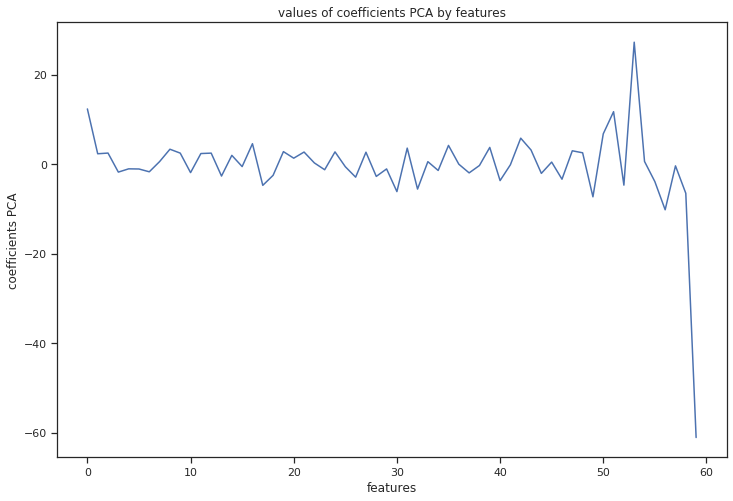

In [334]:
plt.figure(figsize=(12, 8))
plt.plot(modele_pca.coef_)
plt.title("values of coefficients PCA by features")
plt.xlabel("features")
plt.ylabel("coefficients PCA")
plt.show()

In [325]:
modele = linear_model.LinearRegression(fit_intercept=True)
modele.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

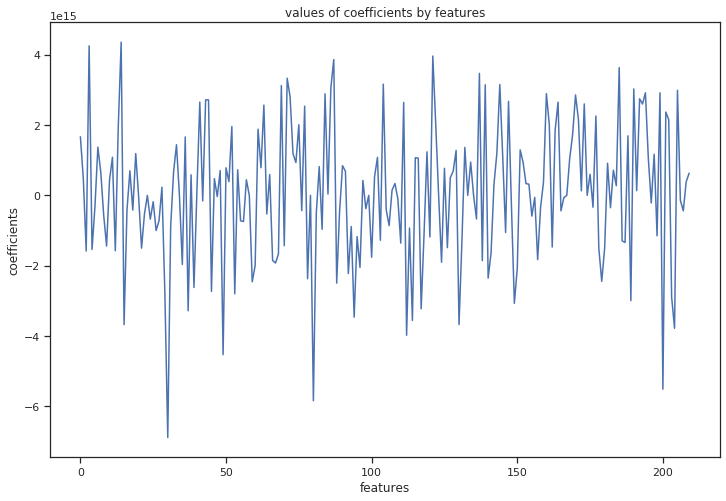

In [326]:
plt.figure(figsize=(12, 8))
plt.plot(modele.coef_)
plt.title("values of coefficients by features")
plt.xlabel("features")
plt.ylabel("coefficients")
plt.show()

### Question 6

In [337]:
intercept_pca = modele_pca.intercept_
print('La valeur de l"intercept avec PCA est: ' + str(intercept_pca))

La valeur de l"intercept avec PCA est: 151.4582639330459


In [338]:
intercept_ols = modele.intercept_
print('La valeur de l"intercept avec OLS est: ' + str(intercept_ols))

La valeur de l"intercept avec OLS est: 150.0692280453258


In [339]:
print('La valeur moyenne de y_train est: ' + str(y_train.mean()))

La valeur moyenne de y_train est: 153.6317280453258


Les 2 intercepts ne sont pas égaux.

In [340]:
scalerX = StandardScaler().fit(X_train_pca)
X_train_pca_center = scalerX.transform(X_train_pca)

In [341]:
modele_pca_center = linear_model.LinearRegression(fit_intercept=True)
modele_pca_center.fit(X_train_pca_center, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
print('La valeur de l"intercept avec les variables PCA centrées et réduites est: ' + str(modele_pca_center.intercept_))

La valeur de l"intercept avec les variables PCA centrées et réduites est: 153.6317280453258


### Question 7

#### OLS

In [346]:
def plt_histo(residus):
    
    plt.figure(figsize=(12, 8))
    sns.distplot(residus, color = 'darkblue', hist = True, hist_kws={'edgecolor':'black'},
                     kde=True, kde_kws = {'color': 'red', 'lw': 2, 'label':'densité'})
    plt.xlabel('Résidus')
    plt.ylabel('Fréquences')
    plt.title('Histogramme des résidus')

In [347]:
y_test_predict_ols = modele.predict(X_test)
res_ols = y_test - y_test_predict_ols

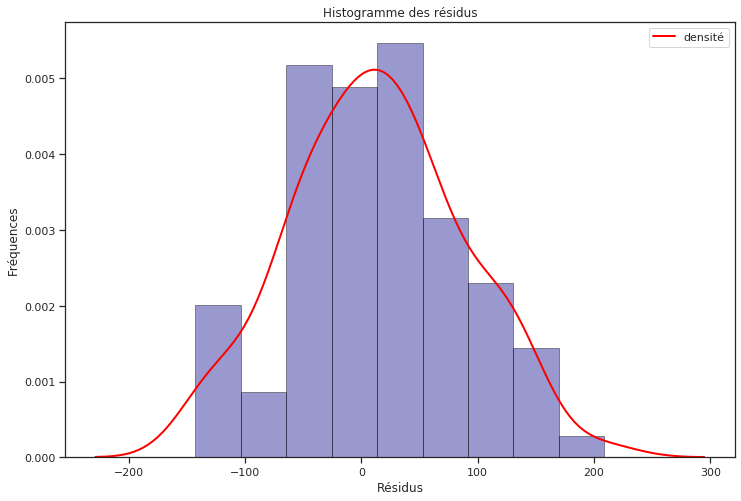

In [348]:
plt_histo(res_ols)

#### coefficient de déterminantion OLS

In [349]:
coef_det_ols = r2_score(y_test, y_test_predict_ols)
print('La valeur du coefficient de détermination OLS est: '+ str(coef_det_ols))

La valeur du coefficient de détermination OLS est: -0.0011629080331720942


#### risque de prédiction OLS

In [350]:
risque_ols = metrics.mean_squared_error(y_test, y_test_predict_ols)
print('La valeur du risque de prédiction est: '+ str(risque_ols))

La valeur du risque de prédiction est: 5568.757788380921


#### PCA

In [351]:
y_test_predict_pca = modele_pca.predict(X_test_pca)
res_pca = y_test - y_test_predict_pca

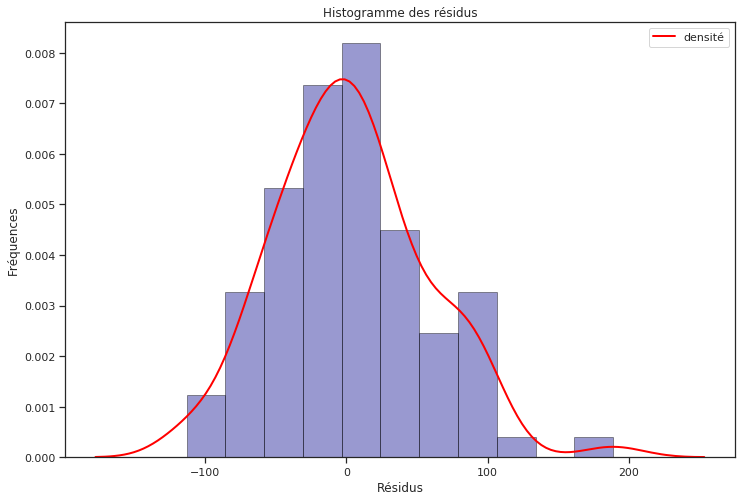

In [352]:
plt_histo(res_pca)

#### coefficient de déterminantion PCA

In [354]:
coef_det_pca = r2_score(y_test, y_test_predict_pca)
print('La valeur du coefficient de détermination PCA est: '+ str(coef_det_pca))

La valeur du coefficient de détermination PCA est: 0.48259699605728756


#### risque de prédiction PCA

In [356]:
risque_pca = metrics.mean_squared_error(y_test, y_test_predict_pca)
print('Le risque de prédiction PCA est: '+ str(risque_pca))

Le risque de prédiction PCA est: 2877.9452223196


### Question 8: forward

In [357]:
def forward(X, y, nb_iteration, stop = False):
    
    p = X.shape[1]
    n = X.shape[0]
    
    var_sel = []
    var_save = list(range(p))
    
    n_iter = nb_iteration
    
    t_stat = np.zeros((p,p))
    p_value = np.zeros((p,p))
    pval_save = np.zeros(p)
    
    for i in range(n_iter):
        resids_mem = np.zeros((p,n))
        
        for index in var_save:
            var = X.values[:, index]
            
            # Définition du modèle linéaire
            mod =  linear_model.LinearRegression(fit_intercept=True)
            mod.fit(var.reshape((-1, 1)), y)
             
            #Prédiction et déterminantion des résidus
            y_pred = mod.predict(X.values[:, index].reshape((-1, 1)))
            resids_mem[index, :] = y - y_pred
            
            #Calcul de la matrice de Gram
            intercept_vector = np.ones((X.shape[0],1))
            var_transpose = np.concatenate((intercept_vector,var.reshape((-1, 1))),axis=1)
            var_transpose = np.dot(var_transpose.T, var_transpose)
            var_cov = np.diag(np.linalg.inv(var_transpose))
            
            # calcul du test statistique
            t_stat[i, index] = (abs(mod.coef_)/ (resids_mem[index, :].std()* np.sqrt(var_cov[1])))
            
            # calcul de la p_value suivant la loi de Student
            p_value[i, index] = (1- stats.t.cdf(abs(t_stat[i, index]), X.shape[0]-2))*2
            
        best_index_var = np.argmax(t_stat[i, :])
        
        if(stop == False):
            pval_save [i] = p_value[i,best_index_var]
            var_sel.append(best_index_var)
        
        if(stop == True):
            if p_value[i,best_index_var] <= 0.1:
                pval_save [i] = p_value[i,best_index_var]
                var_sel.append(best_index_var)
            else:
                break;                
        
        y = resids_mem[best_index_var, :]
        var_save = np.setdiff1d(var_save,var_sel)
    return t_stat, pval_save, var_sel

In [306]:
t_stat, p_values, var_sel = forward(X_train, y_train, 210)

### Question 9

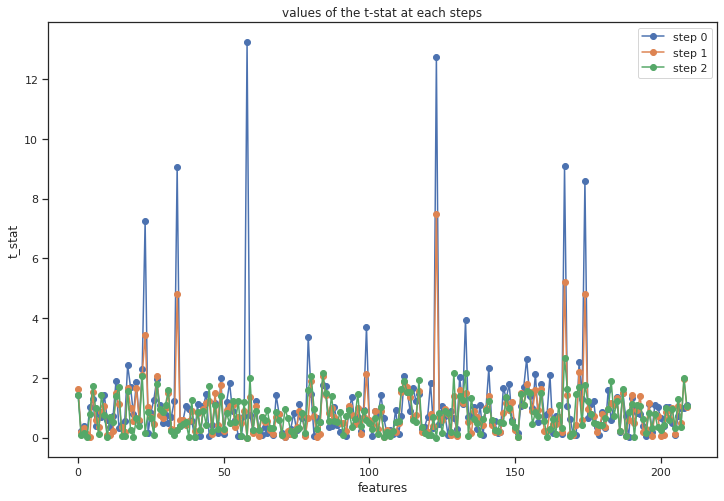

In [303]:
p = X_train.shape[1]
plt.figure(figsize=(12, 8))
for i in range(3): 
    plt.plot(np.arange(p),t_stat[i,:], '-o',label =  "step %s" % i)
plt.legend(loc=1)
plt.title("values of the t-stat at each steps")
plt.xlabel("features")
plt.ylabel("t_stat")
plt.show()

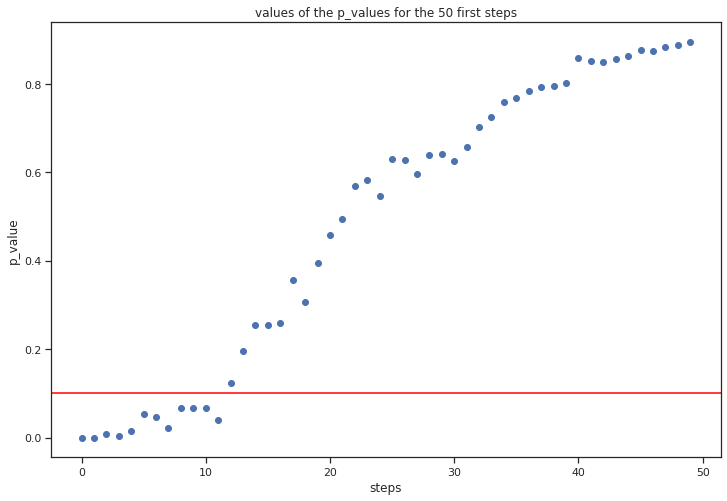

In [309]:
plt.figure(figsize=(12, 8))
plt.plot(p_values[0:50], 'o')
plt.axhline(y=0.1, color = 'red', title='')
plt.title("values of the p_values for the 50 first steps")
plt.xlabel("steps")
plt.ylabel("p_value")
plt.show()

In [311]:
t_stat, p_values, var_sel = forward(X_train, y_train, 210, True)

In [312]:
print('Les variables sélectionnées suite au forward sont: ' + str(var_sel))

Les variables sélectionnées suite au forward sont: [58, 123, 167, 133, 129, 183, 80, 27, 114, 159, 135, 34]


#### Modèle OLS forward

In [359]:
modele_forward = linear_model.LinearRegression(fit_intercept=True)
modele_forward.fit(X_train[var_sel], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [361]:
y_test_predict_forward = modele_forward.predict(X_test[var_sel])
res_ols_forward = y_test - y_test_predict_forward

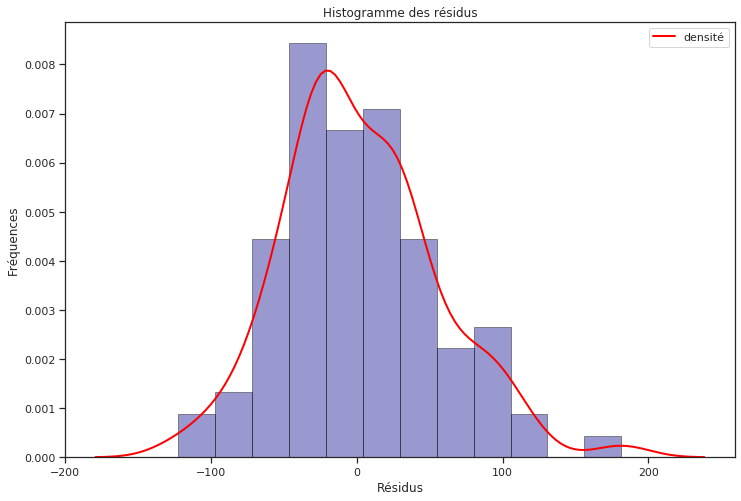

In [362]:
plt_histo(res_ols_forward)

In [364]:
risque_ols_forward = metrics.mean_squared_error(y_test, y_test_predict_forward)
print('Le risque de prédiction OLS forward est: ' + str(risque_ols_forward))

Le risque de prédiction OLS forward est: 2796.849873655149


On constate que ce risque de prédiction est très inférieure à celui de la méthode OLS classique et légèrement inférieur 
à celle de PCA before OLS.

### Question 11

In [392]:
kf = KFold(n_splits=4, shuffle = True, random_state=42)
kf.get_n_splits(X_train)
index_select = []
for index in kf.split(X_train):
    index_select.append(index)
    X_train_fold = X_train.iloc[index[0],:]
    y_train_fold = y_train.iloc[index[0]]
print('Les échantillons sélectionnés sont: '+ str(index_select))

Les échantillons sélectionnés sont: [(array([  0,   1,   2,   4,   6,   8,  10,  11,  12,  13,  14,  17,  18,
        19,  20,  21,  23,  24,  26,  27,  28,  29,  31,  32,  34,  35,
        36,  37,  38,  40,  41,  43,  44,  47,  48,  49,  50,  51,  52,
        53,  54,  58,  59,  60,  61,  62,  64,  65,  67,  68,  69,  70,
        71,  74,  79,  80,  81,  83,  85,  86,  87,  88,  89,  91,  92,
        95,  96,  97,  98,  99, 100, 102, 103, 104, 105, 106, 107, 108,
       111, 112, 114, 115, 117, 120, 121, 122, 123, 125, 127, 128, 129,
       130, 131, 133, 134, 135, 136, 138, 141, 142, 143, 144, 146, 147,
       149, 150, 151, 152, 153, 154, 156, 159, 160, 161, 162, 163, 164,
       165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 182,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 195, 196, 197, 199,
       200, 201, 203, 204, 205, 206, 207, 210, 212, 213, 214, 215, 216,
       217, 218, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231,
       233, 234, 235, 236,

### Question 12

In [365]:
def ridgeCV(X_train, params):
    
    kf = KFold(n_splits=4, shuffle = True, random_state=42)
    kf.get_n_splits(X_train)
    
    mean_risque = []    
    
    for param in params:
        risque_ridge = []
        for index in kf.split(X_train):
            X_train_fold = X_train.iloc[index[0],:]
            y_train_fold = y_train.iloc[index[0]]

            X_test_fold = X_train.iloc[index[1],:]
            y_test_fold = y_train.iloc[index[1]]

            ridge_regressor = Ridge(alpha=param).fit(X_train_fold, y_train_fold)

            y_test_fold_predict = ridge_regressor.predict(X_test_fold)
            risque_ridge.append(metrics.mean_squared_error(y_test_fold, y_test_fold_predict))

        mean_risque.append(np.mean(risque_ridge))
    return mean_risque
    

In [366]:
params  = np.arange(1,250, 0.1)
mean_risque_ridge = ridgeCV(X_train, params)
mean_risque_comb = np.mean(mean_risque_ridge)
print('Le risque de prédiction moyen est: ' + str(mean_risque_comb))

Le risque de prédiction moyen est: 3733.513202696251


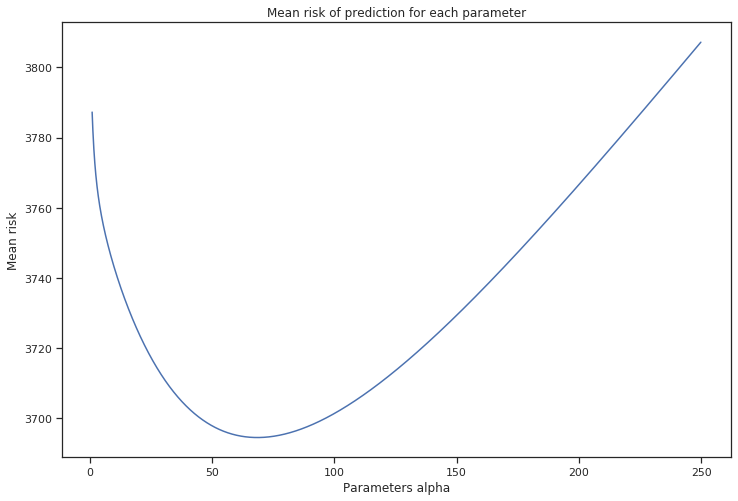

In [375]:
plt.figure(figsize=(12, 8))
plt.plot(params,mean_risque_ridge)
plt.title("Mean risk of prediction for each parameter")
plt.xlabel("Parameters alpha")
plt.ylabel("Mean risk")
plt.show()

In [56]:
index_min_ridge = np.argmin(mean_risque_ridge)

In [376]:
print('La valeur du paramètre optimal est: ' + str(params[index_min_ridge]))

La valeur du paramètre optimal est: 68.50000000000006


In [377]:
mod_ridge = Ridge(alpha=params[index_min_ridge]).fit(X_train, y_train)
y_test_ridge = mod_ridge.predict(X_test)  
risque_ridge = metrics.mean_squared_error(y_test, y_test_ridge)
print('Le risque ridge avec le paramètre optimal est: ' + str(risque_ridge))

Le risque ridge avec le paramètre optimal est: 2896.454286053263


### Question 13

In [378]:
params_lasso  = np.arange(1,250, 0.1)
modele_lasso = LassoCV(alphas=params_lasso, cv=5).fit(X_train, y_train)

In [379]:
print('La valeur du paramètre optimal est: ' + str(modele_lasso.alpha_))

La valeur du paramètre optimal est: 7.100000000000005


In [380]:
y_test_predict_lasso = modele_lasso.predict(X_test)
risque_lasso = metrics.mean_squared_error(y_test, y_test_predict_lasso)
print('Le risque de prédiction lasso est: ' + str(risque_lasso))

Le risque de prédiction lasso est: 2773.860874721561


### Question 14

In [381]:
variables_lasso = np.where(modele_lasso.coef_ != 0)

In [383]:
val_lasso = variables_lasso[0]
print('Les variables sélectionnées par le Lasso sont: ' + str(val_lasso))

Les variables sélectionnées par le Lasso sont: [ 58 123 167 174]


In [385]:
count_val_lasso = variables_lasso[0].shape[0]
print('Le nombre de variable sélectionné par Lasso est: ' + str(count_val_lasso))

Le nombre de variable sélectionné par Lasso est: 4


#### Méthode OLS aux variables Lasso

In [386]:
modele_ols_lasso = linear_model.LinearRegression(fit_intercept=True)
modele_ols_lasso.fit(X_train.iloc[:, val_lasso], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [387]:
y_test_predict_ols_lasso = modele_ols_lasso.predict(X_test.iloc[:, val_lasso])
risque_ols_lasso = metrics.mean_squared_error(y_test, y_test_predict_ols_lasso)
print('Le risque de prédiction OLS sur variables Lasso est: ' + str(risque_ols_lasso))

Le risque de prédiction OLS sur variables Lasso est: 2685.827809017969


### Question 15

In [388]:
def rdfCV(X_train, val_rdf, params_rdf):
    kf = KFold(n_splits=4, shuffle = True, random_state=42)
    kf.get_n_splits(X_train)
    
    mean_risque_rdf = []

    for param in params_rdf:
        risque_rdf = []
        for index in kf.split(X_train.iloc[:, val_rdf]):
            X_train_rdf = X_train.iloc[index[0],:]
            y_train_rdf= y_train.iloc[index[0]]

            X_test_rdf = X_train.iloc[index[1],:]
            y_test_rdf = y_train.iloc[index[1]]

            modele_regr = RandomForestRegressor(max_depth=param, random_state=42, n_estimators=100).fit(X_train_rdf, y_train_rdf)

            y_test_rdf_predict = modele_regr.predict(X_test_rdf)
            risque_rdf.append(metrics.mean_squared_error(y_test_rdf, y_test_rdf_predict))

        mean_risque_rdf.append(np.mean(risque_rdf))
    return mean_risque_rdf

In [389]:
params_rdf  = np.arange(1,15,1)
mean_risque_rdf = rdfCV(X_train, val_lasso, params_rdf)

In [390]:
mean_risque_rdf_comb = np.mean(mean_risque_rdf)
print('Le risque de prédiction RDF est: ' + str(mean_risque_rdf_comb))

Le risque de prédiction RDF est: 3617.2386738633454


In [391]:
index_min_rdf = np.argmin(mean_risque_rdf)
print('Le meilleur paramètre RDF est: ' + str(params_rdf[index_min_rdf]))

Le meilleur paramètre RDF est: 5
